   # Market Segmentation (By Anusha S Suvarna)

## Description
##### Marketing is crucial for the growth and sustainability of any business.
##### Marketers can help build the company’s brand, engage customers, grow revenue, and increase sales.
##### One of the key pain points for marketers is to know their customers and identify their needs.
##### By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
##### If data about the customers is available, data science can be applied to perform market segmentation. 
##### In this case study, we have been hired as a consultant to a bank in New York City. 
##### The bank has extensive data on their customers for the past 6 months. 

### Objective:  The marketing team at the bank wants to launch a targeted marketing campaign by dividing their customers into at least 3 distinctive groups.  

#### Used Unsupervised Learning algorithm
##### Model used  k means clustering, hierarchial clustering, Pca  
##### The bank want to launch a new product and they want to do some advertize to existing customers

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Check Current Directory 
os.getcwd()

'C:\\Users\\hp'

In [3]:
# Change the directory 
os.chdir ('C:\\Users\\hp\\OneDrive\\Desktop\\twinkle\\DS\\Batch 67 Day 28\\Projects\\Project -5 Marketting Department')
os.getcwd()


'C:\\Users\\hp\\OneDrive\\Desktop\\twinkle\\DS\\Batch 67 Day 28\\Projects\\Project -5 Marketting Department'

In [4]:
# Load Data, display  records
creditcard_df = pd.read_csv('Marketing_data.csv')
display (creditcard_df )

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

## Dataset Description
##### CUSTID: Identification of Credit Card holder 
##### BALANCE: Balance amount left in customer's account to make purchases
##### BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
##### PURCHASES: Amount of purchases made from account
##### ONEOFFPURCHASES: Maximum purchase amount done in one-go
##### INSTALLMENTS_PURCHASES: Amount of purchase done in instalment
##### CASH_ADVANCE: Cash in advance given by the user
##### PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
##### ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
##### PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
##### CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
##### CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
##### PURCHASES_TRX: Number of purchase transactions made
##### CREDIT_LIMIT: Limit of Credit Card for user
##### PAYMENTS: Amount of Payment done by user
##### MINIMUM_PAYMENTS: Minimum amount of payments made by user  
##### PRC_FULL_PAYMENT: Percent of full payment paid by user
##### TENURE: Tenure of credit card service for user

In [5]:
# Data Set Details - Info
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### 18 features with 8950 points  

In [6]:
# Data Set Details – Describe
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

##### Mean balance is $1564 

#####  Balance frequency is frequently updated on average ~0.9

##### Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low

##### Average purchases frequency is around 0.5
##### Average credit limit ~ 4500
##### Percent of full payment is 15%
##### Average tenure is 11 years

##### Purchases average is $1000

##### One off purchase average is ~$600

In [6]:
# Customer with maximum 'ONEOFF_PURCHASES' 
# ONEOFFPURCHASES means Maximum purchase amount done in one-go
# Check who made one off purchase of $40761 ie maximum ONEOFF_PURCHASES (because in data describe max one off purchase is $40761)
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [7]:
# Customer who gave cash maximum time in Advance 
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [8]:
# Check who made cash advance of $47137
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

##### This customer with CUST_ID C12226 made cash advance transactions 123 times
##### Never paid credit card in full

## VISUALIZE AND EXPLORE DATASET

In [10]:
# Check for missing Data 
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

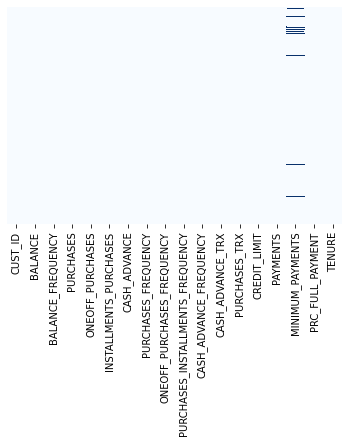

In [11]:
# Heat map for missing data  
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [12]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' column
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [15]:
# Check missing values 
# As we have already filled missing value with mean of their respective column, we can see there is no missing value in the data
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

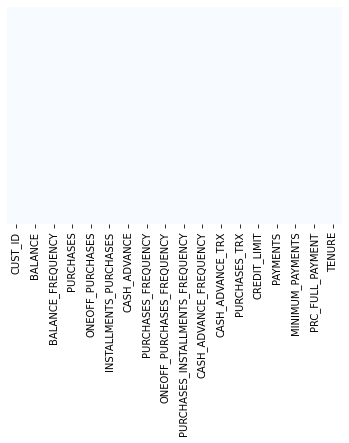

In [16]:
# Missing values Heatmap 
# No missing value found now
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [17]:
# Check for duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [18]:
# Drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)
display(creditcard_df)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [19]:
# display Number of Columns 
n = len(creditcard_df.columns)
display(n)

17

In [20]:
# Display all Column Names 
display (creditcard_df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

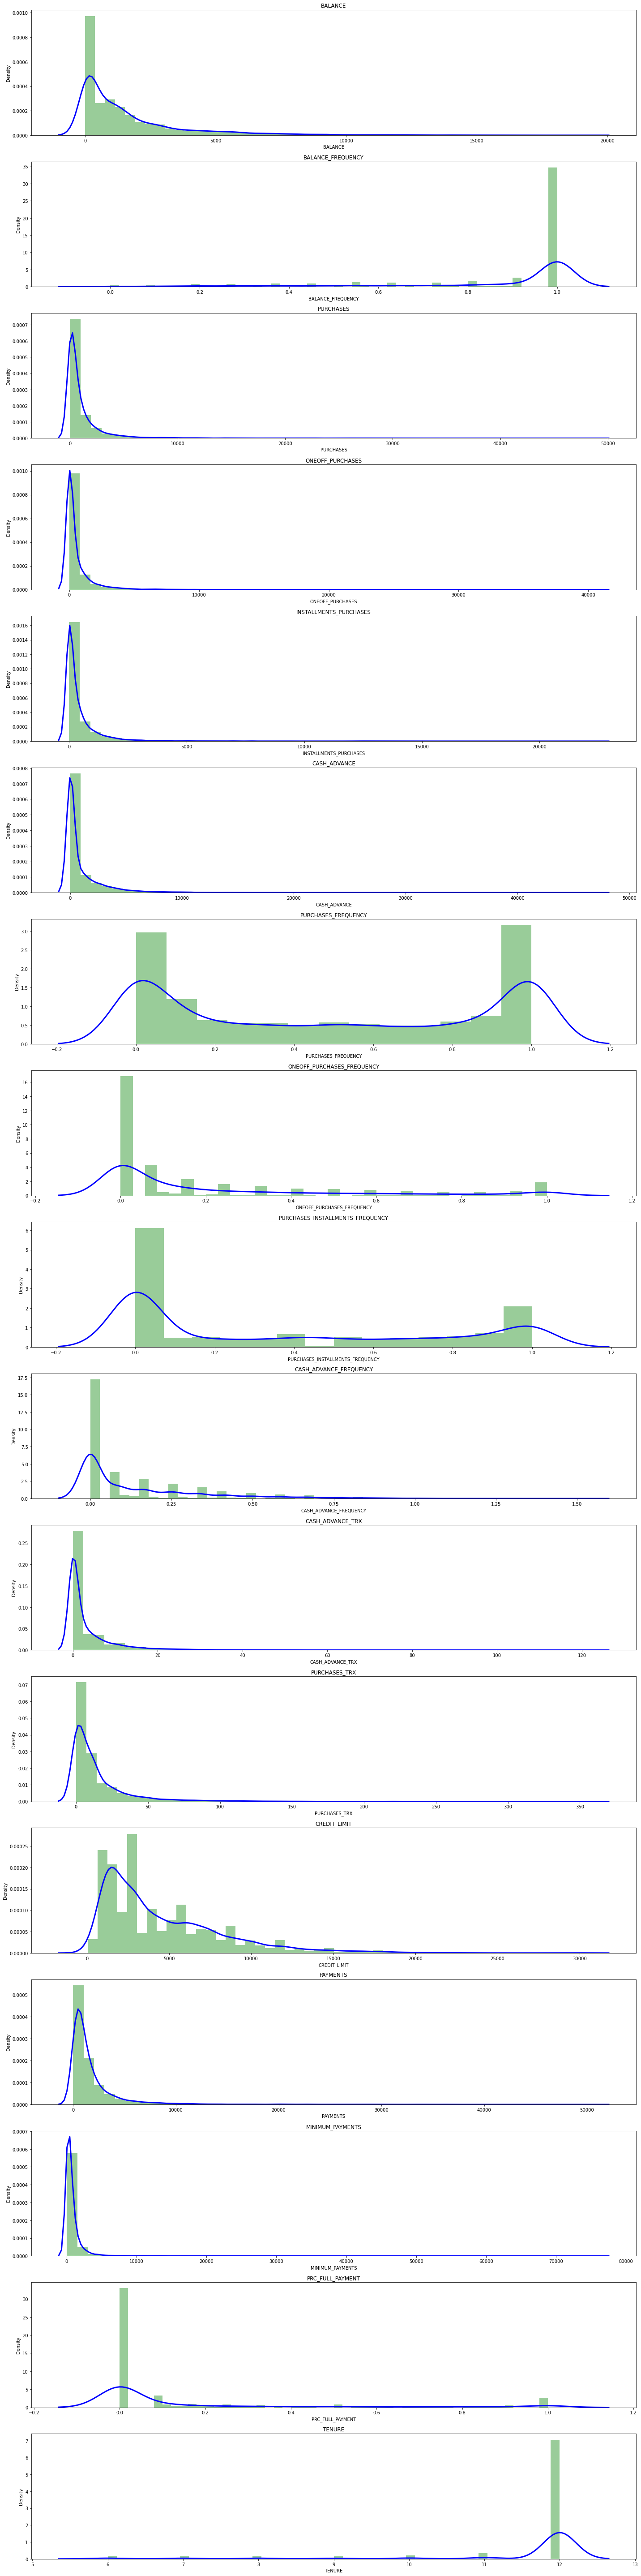

In [21]:
# Create dist plot 

# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

plt.figure(figsize=(20,80))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

##### 'Balance_Frequency' for most customers is updated frequently ~1
##### For 'PURCHASES_FREQUENCY', there are two distinct group of customers
##### For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
##### Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
##### Most customers are ~12 years tenure

### Creating Pairplot

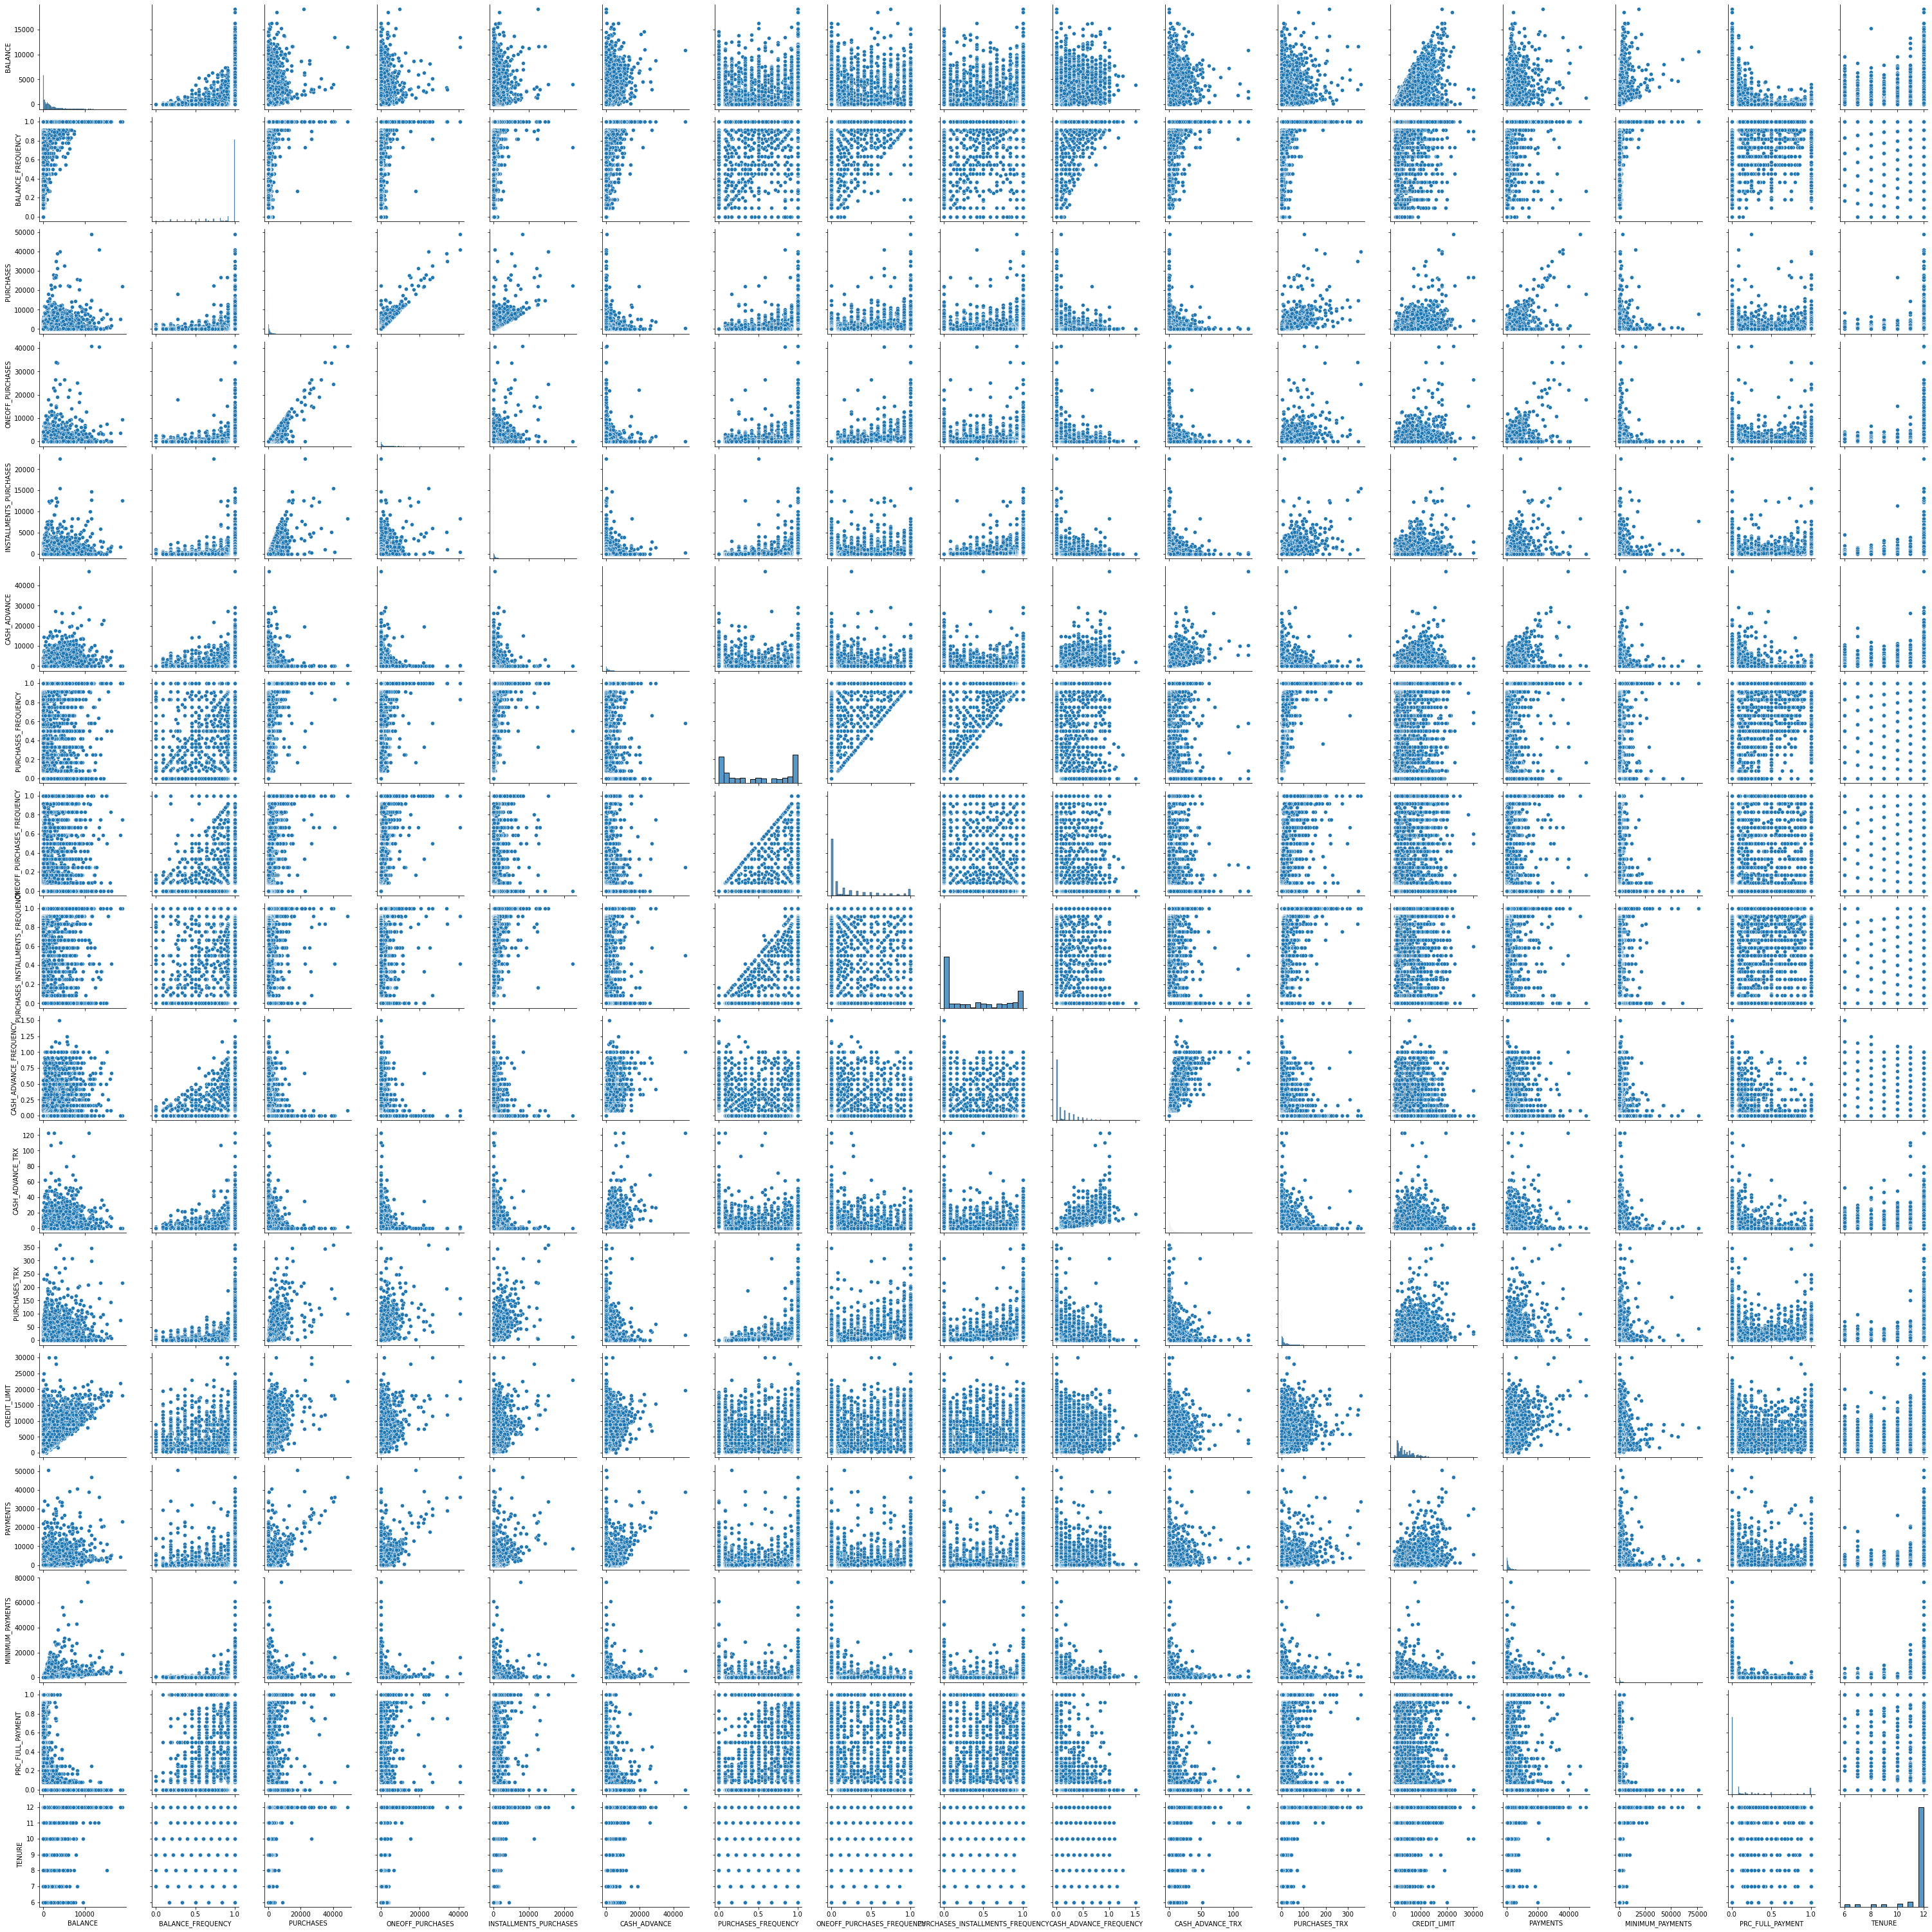

In [22]:
# creating Pairplot- similar to heatmap - it says what is the relation of every variable with every other variable
# it says whether it is good correlation or not (to identify correlation =  if x increases , y increses- positive relation)
# ( if x increses , y decreses- negative relation)
# if data is fully scattered it tells  there is no relation
sns.pairplot(creditcard_df)

##### Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
##### Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

In [23]:
# Display Co relation Matrix  
correlations = creditcard_df.corr()
display (correlations )

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

<AxesSubplot:>

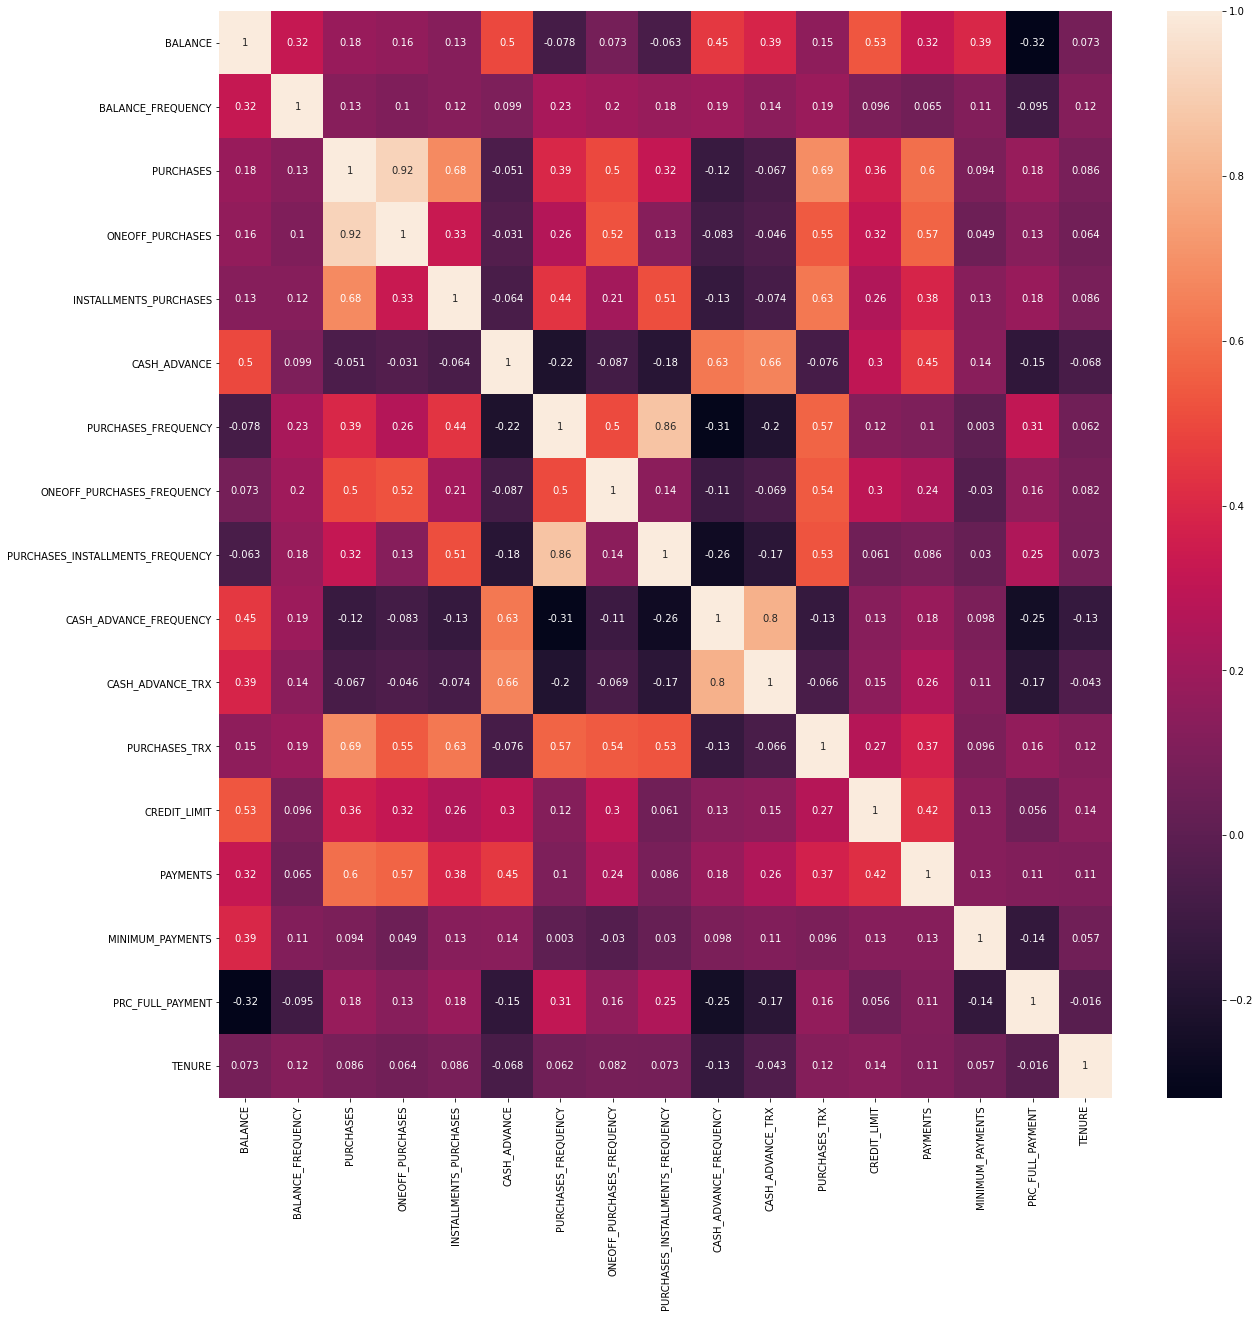

In [24]:
# Create Heat Map 
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

##### 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
##### Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

### OPTIMAL NUMBER OF CLUSTERS 

In [25]:
# Display the Data Set 
display (creditcard_df)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [26]:
# Standardise the Data  
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)


In [27]:
# Display the Shape
creditcard_df_scaled.shape

(8950, 17)

In [28]:
# Display Standardised Data Set 
display(pd.DataFrame(creditcard_df_scaled))

0         1         2         3         4         5         6   \
0    -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1     0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2     0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3     0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4    -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.737950  0.518084 -0.333293 -0.356934 -0.132643 -0.466786  1.269843   
8946 -0.742423  0.518084 -0.329136 -0.356934 -0.122823 -0.466786  1.269843   
8947 -0.740398 -0.185477 -0.401965 -0.356934 -0.294893 -0.466786  0.854576   
8948 -0.745174 -0.185477 -0.469552 -0.356934 -0.454576 -0.449352 -1.221758   
8949 -0.572575 -0.889033  0.042146  0.301732 -0.454576 -0.406205  0.439310   

            7         8         9         10        11        12        13  \
0    -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1    -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2     2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3    -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4    -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.486217   
8946 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.503396   
8947 -0.678661  0.760469 -0.675349 -0.476070 -0.390639 -0.960433 -0.570615   
8948 -0.678661 -0.916995  0.157527 -0.182998 -0.591796 -1.097856 -0.580536   
8949  1.556082 -0.916995  0.990398 -0.182998  0.333524 -0.905464 -0.576869   

                14        15        16  
0    -3.109675e-01 -0.525551  0.360680  
1     8.931021e-02  0.234227  0.360680  
2    -1.016632e-01 -0.525551  0.360680  
3    -4.390474e-16 -0.525551  0.360680  
4    -2.657913e-01 -0.525551  0.360680  
...            ...       ...       ...  
8945 -3.498541e-01  1.183951 -4.122768  
8946 -4.390474e-16 -0.525551 -4.122768  
8947 -3.354655e-01  0.329200 -4.122768  
8948 -3.469065e-01  0.329200 -4.122768  
8949 -3.329464e-01 -0.525551 -4.122768  

[8950 rows x 17 columns]

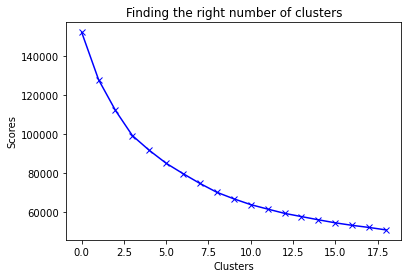

In [29]:
# Create Elbow Graph  

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

##### From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
##### However, the values does not reduce linearly until 8th cluster. 
##### Let's choose the number of clusters to be 8.

## 1. K - Means Clustering

In [30]:
# APPLY K -Means 
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [31]:
# Number of Clusters 
kmeans.cluster_centers_.shape

(8, 17)

In [32]:
# Cluster Centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
display(cluster_centers )          

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.365376          0.333430  -0.037549        -0.244521   
1  1.699636          0.393399  -0.216668        -0.155678   
2  0.018988          0.404056  -0.362160        -0.247481   
3  0.901817          0.466986   2.270963         1.756936   
4 -0.161258          0.391841   0.453685         0.593268   
5 -0.701210         -2.140684  -0.310913        -0.235462   
6 -0.336717         -0.351618  -0.289556        -0.216192   
7  1.923051          0.337717  11.212042        10.600367   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.360254    -0.365004            0.991217   
1              -0.226370     2.026796           -0.472754   
2              -0.401545    -0.085558           -0.867645   
3               2.141920    -0.195512            1.158629   
4              -0.017360    -0.332048            0.941220   
5              -0.302449    -0.322400           -0.555391   
6              -0.287105     0.068131           -0.204713   
7               7.033118     0.419625            1.046983   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.387760                         1.206940   
1                  -0.211581                        -0.410279   
2                  -0.411249                        -0.758577   
3                   1.583889                         1.226198   
4                   1.874193                         0.089564   
5                  -0.442821                        -0.439779   
6                  -0.289287                        -0.225660   
7                   1.915501                         0.981334   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.476073        -0.361839      0.187641    -0.260776   
1               1.921920         1.942711     -0.264747     1.038660   
2               0.116672        -0.019935     -0.487257    -0.306270   
3              -0.312181        -0.212097      2.781452     1.238947   
4              -0.406121        -0.322194      0.524385     0.377442   
5              -0.521503        -0.376311     -0.419459    -0.178034   
6               0.308086         0.000466     -0.388444    -0.566467   
7              -0.258912         0.061229      5.362438     3.044064   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.217535        -0.032678         0.314258  0.257535  
1  0.828056         0.558046        -0.392175  0.071004  
2 -0.247787        -0.008337        -0.456223  0.272010  
3  1.290295         0.441655         0.304778  0.334182  
4  0.087496        -0.161830         0.403800  0.260639  
5 -0.202124        -0.256992         0.281130  0.201867  
6 -0.392990        -0.208809         0.013145 -3.202809  
7  8.098975         1.120318         1.110132  0.310863

In [33]:
# Inverse Transformation- Convert to original Data
# In order to understand what these numbers mean, perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
display(cluster_centers)

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   803.975428          0.956257    922.979916       186.582195   
1  5102.122809          0.970463    540.289825       334.043981   
2  1603.997209          0.972988    229.443586       181.670169   
3  3441.530986          0.987896   5855.151608      3508.591111   
4  1228.829033          0.970094   1972.510118      1577.141330   
5   104.964599          0.370162    338.934708       201.619102   
6   863.627544          0.793976    384.563451       233.602408   
7  5567.142164          0.957273  24957.905000     18186.875667   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             736.841256   213.439746            0.888174   
1             206.364203  5229.157217            0.300611   
2              47.955224   799.452462            0.142123   
3            2347.978936   568.874079            0.955365   
4             395.368789   282.550045            0.868108   
5             137.566918   302.783168            0.267445   
6             151.442584  1121.745122            0.408189   
7            6771.029333  1858.844605            0.910556   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.086781                         0.844106   
1                   0.139339                         0.201382   
2                   0.079774                         0.062959   
3                   0.674962                         0.851760   
4                   0.761566                         0.400032   
5                   0.070355                         0.189658   
6                   0.116158                         0.274754   
7                   0.773889                         0.754444   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.039877         0.779543     19.373883   3545.640617   
1               0.519740        16.506403      8.129220   8273.521008   
2               0.158491         3.112785      2.598457   3380.112662   
3               0.072674         1.801418     83.846336   9002.245863   
4               0.053875         1.050091     27.744080   5867.738864   
5               0.030786         0.680779      4.283658   3846.688776   
6               0.196795         3.252006      5.054575   2433.410031   
7               0.083333         3.666667    148.000000  15570.000000   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1103.400546       788.052010         0.245630  11.861966  
1   4130.284459      2164.709397         0.039010  11.612340  
2   1015.823684       844.777563         0.020277  11.881337  
3   5468.421612      1893.464949         0.242857  11.964539  
4   1986.435913       487.069414         0.271819  11.866120  
5   1148.014996       265.297719         0.235940  11.787468  
6    595.475430       377.585275         0.157559   7.231140  
7  25178.882690      3475.059479         0.478409  11.933333

##### First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104 dollar) and cash advance (303 dollar), Percentage of full payment = 23%
##### Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000 dollar) and cash advance (~5000 dollar), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16 ) and low percentage of full payment (3%)
##### Third customer cluster (VIP/Prime): high credit limit  16K and highest percentage of full payment, target for increase credit limit and increase spending habits
##### Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [34]:
# Display Cluster Details 
display(labels.shape) # Labels associated to each data point
display (labels.max())
display (labels.min())
         

(8950,)

7

0

In [35]:
# Display Cluster numbers 
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
display(y_kmeans)


array([0, 4, 3, ..., 7, 7, 7])

In [36]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        4  
3     0.000000        864.206542          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        2

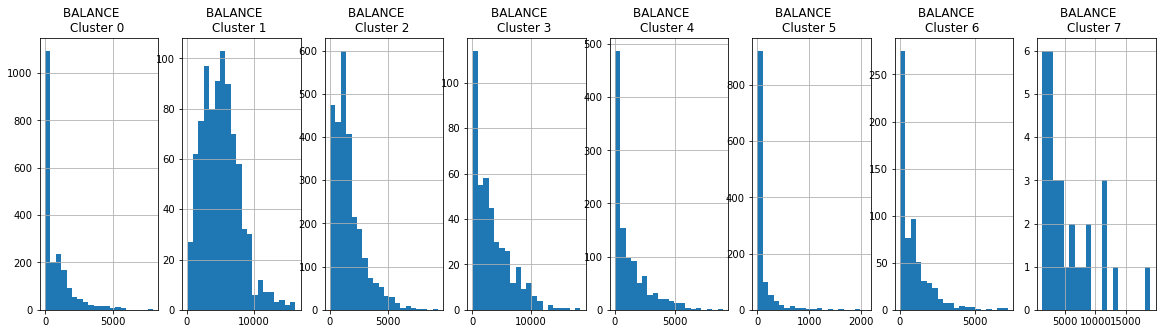

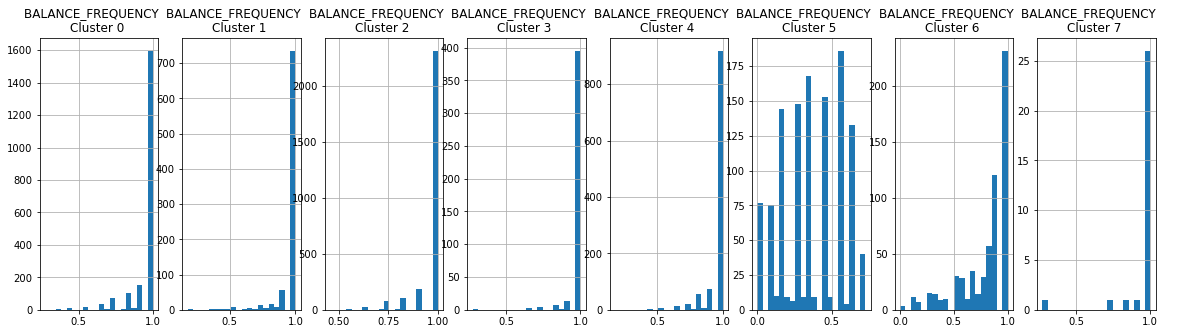

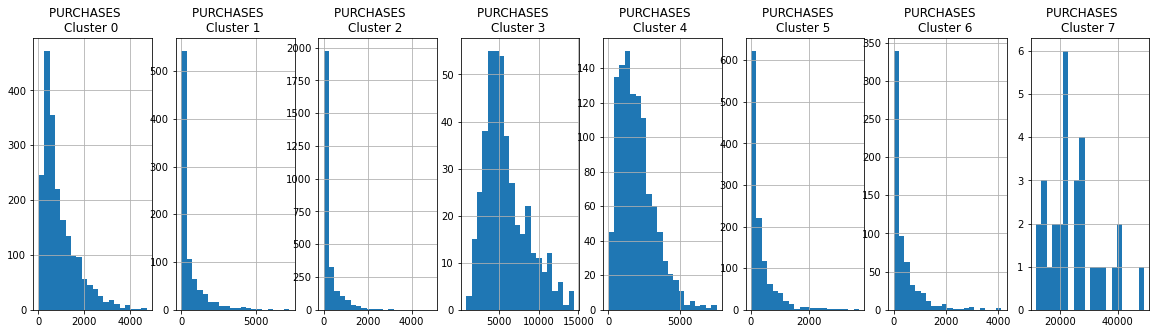

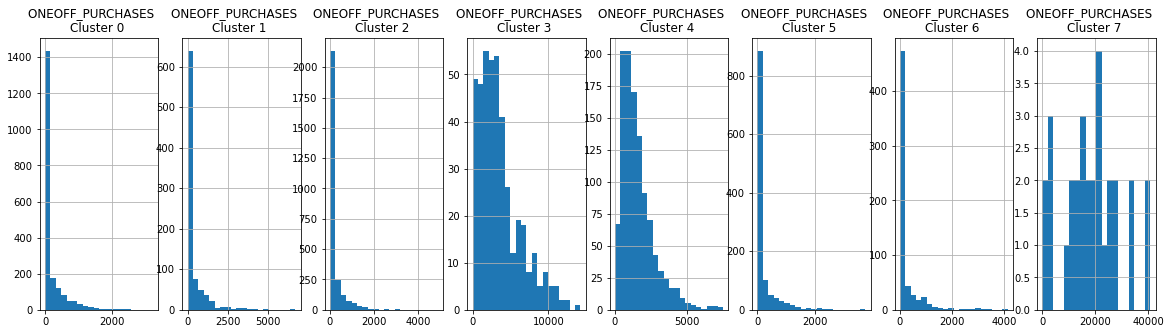

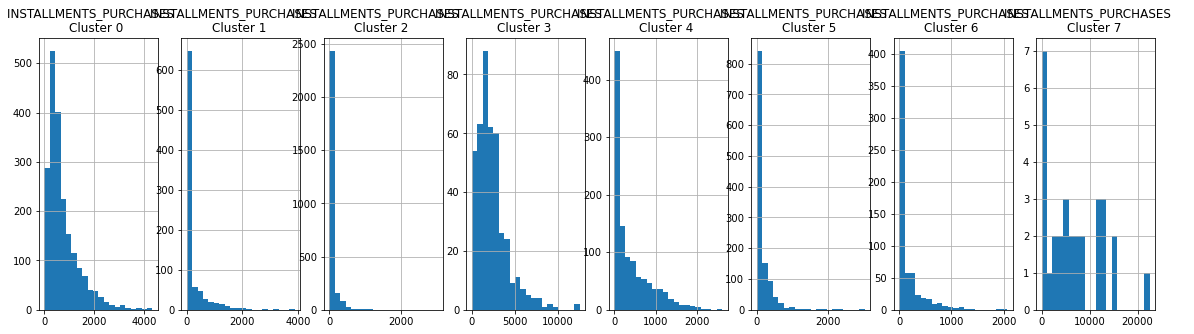

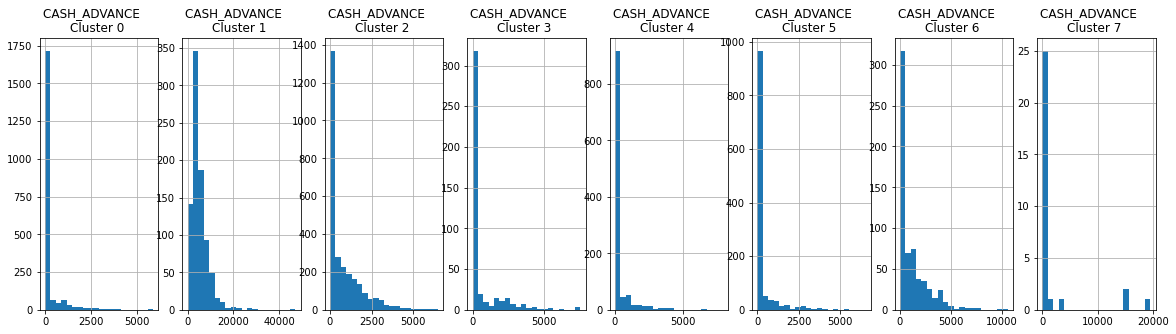

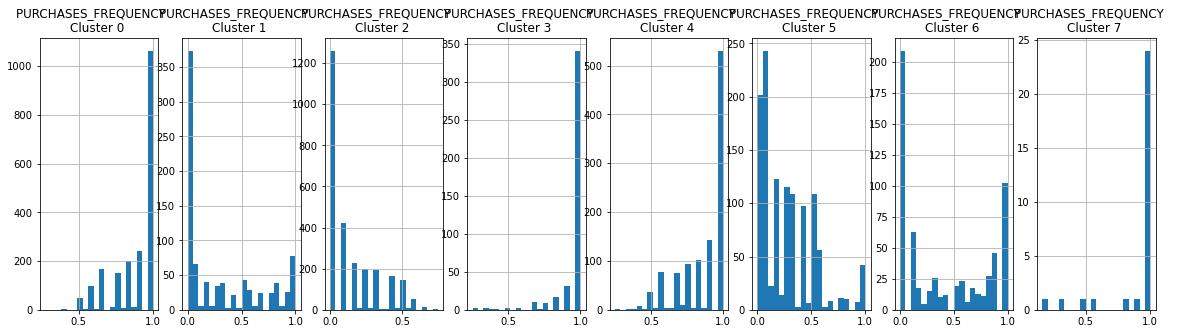

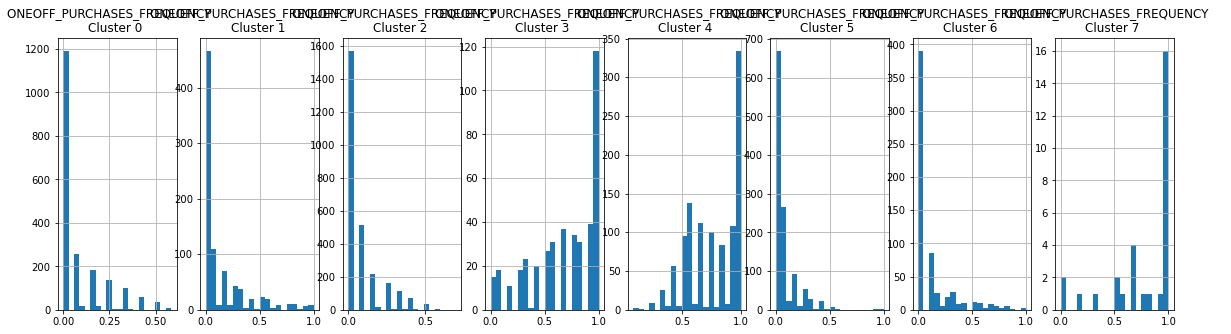

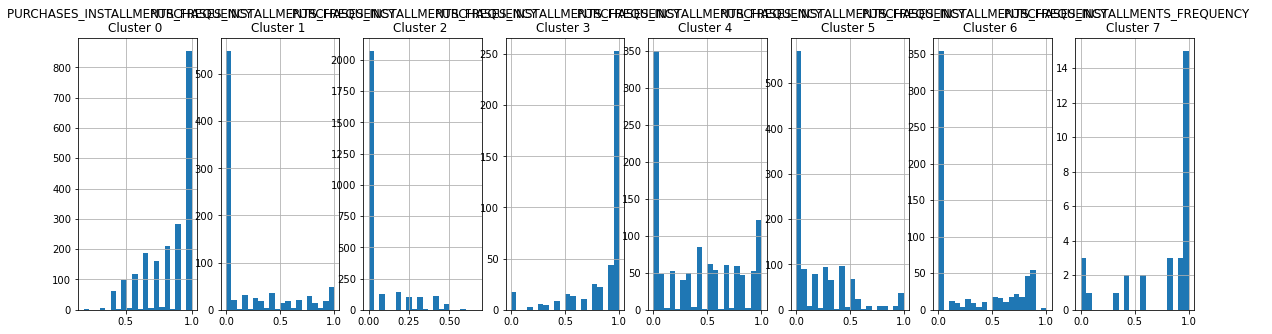

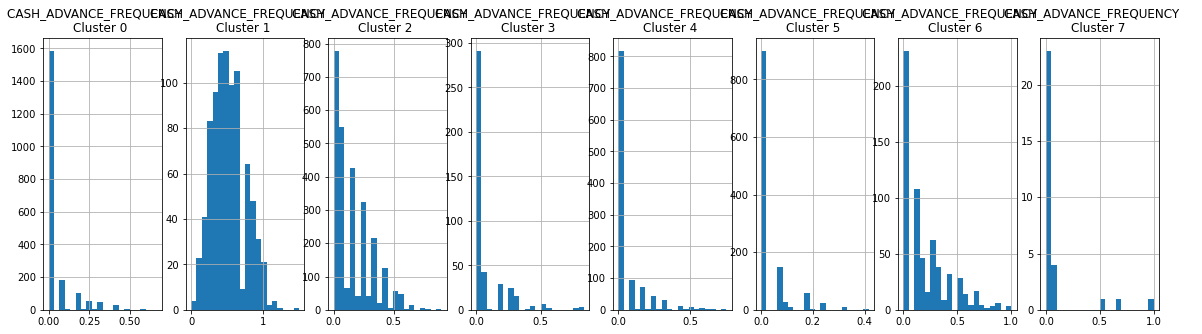

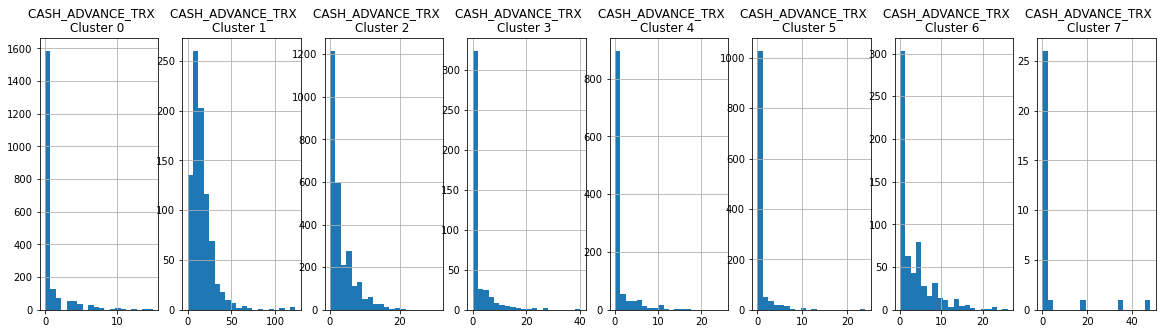

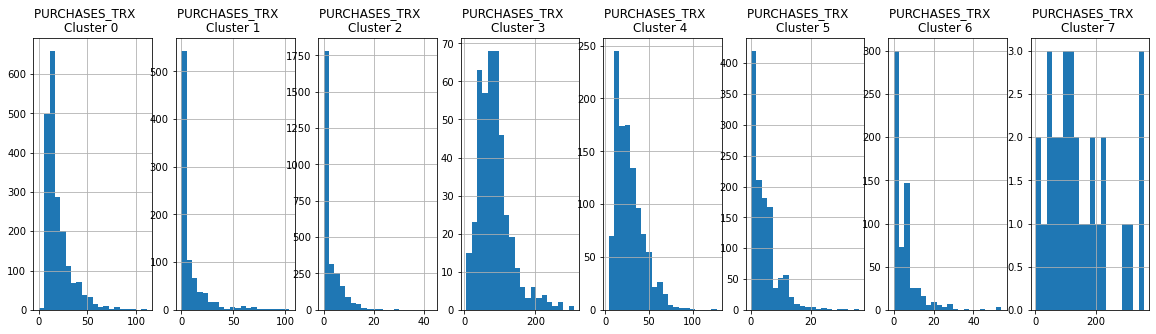

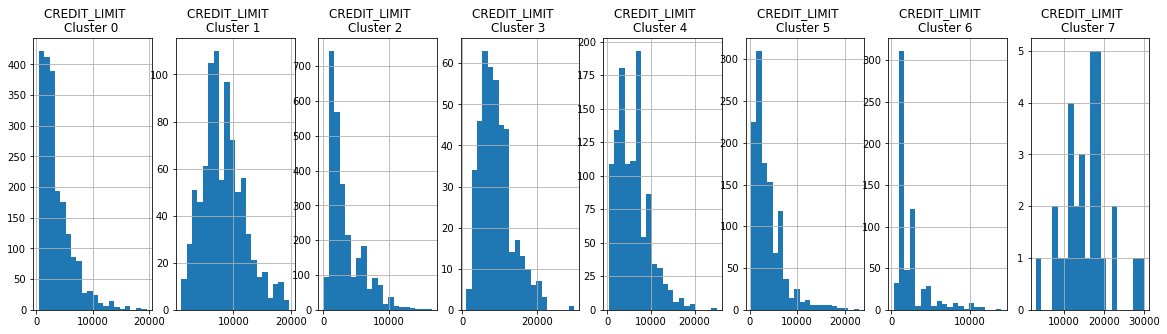

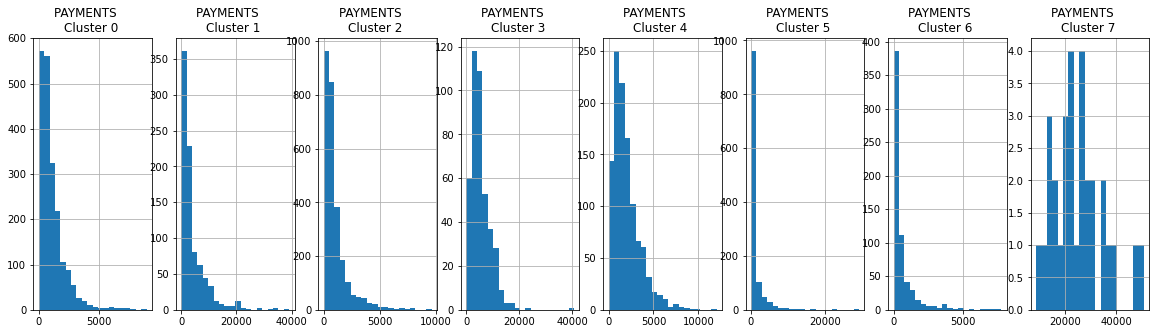

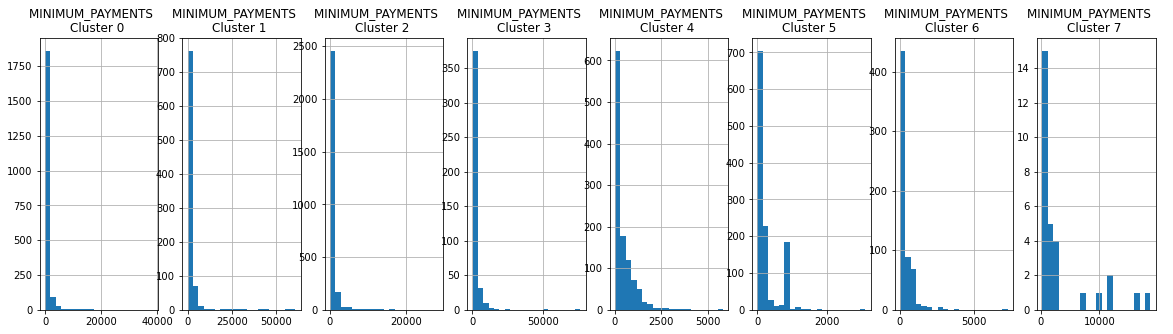

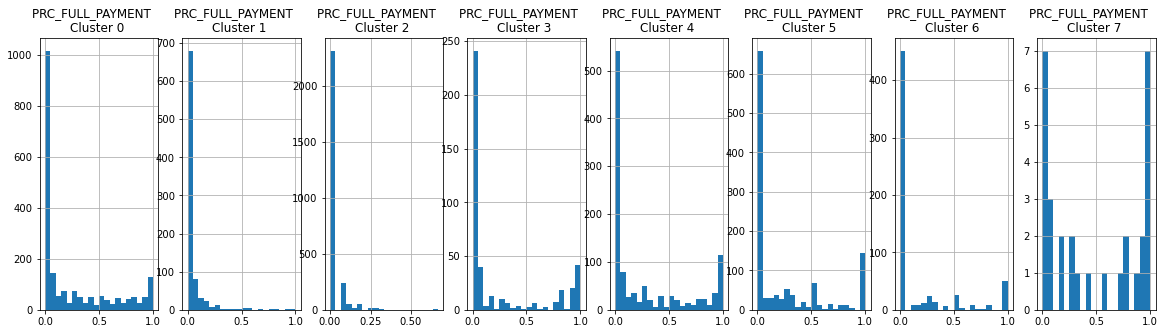

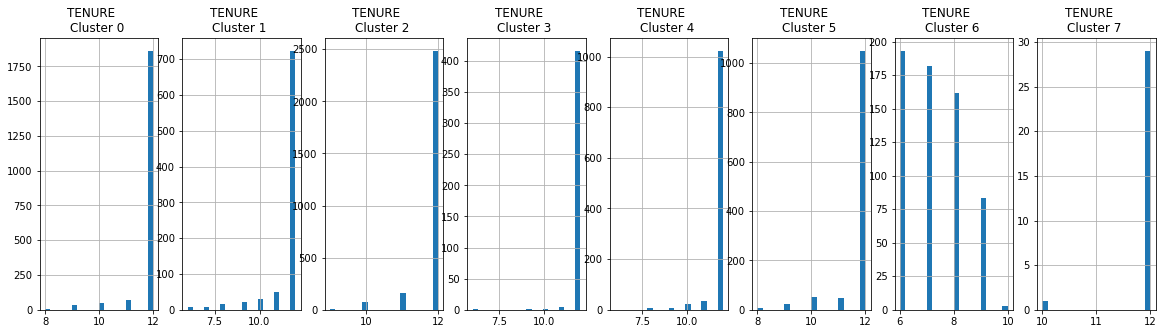

In [37]:
# Plot the histogram of various clusters
# this graph shows the relation between one variable to another variable
for i in creditcard_df.columns:
  plt.figure(figsize = (20,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


## 2. PRINCIPAL COMPONENT ANALYSIS 

In [38]:
# PCA with n components = 2
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
display(principal_comp)

array([[-1.68222051, -1.07644994],
       [-1.13829486,  2.50647039],
       [ 0.96968244, -0.38351015],
       ...,
       [-0.92620346, -1.81078614],
       [-2.33655065, -0.65797142],
       [-0.55642139, -0.40047045]])

In [39]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682221 -1.076450
1 -1.138295  2.506470
2  0.969682 -0.383510
3 -0.873629  0.043178
4 -1.599433 -0.688584

In [40]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
display(pca_df)

pca1      pca2  cluster
0    -1.682221 -1.076450        2
1    -1.138295  2.506470        1
2     0.969682 -0.383510        4
3    -0.873629  0.043178        2
4    -1.599433 -0.688584        2
...        ...       ...      ...
8945 -0.359629 -2.016148        6
8946 -0.564370 -1.639112        6
8947 -0.926203 -1.810786        6
8948 -2.336551 -0.657971        6
8949 -0.556421 -0.400470        6

[8950 rows x 3 columns]

In [41]:
# Number of records in each cluster  
pca_df.value_counts(pca_df.cluster)

cluster
2    2723
0    2014
5    1180
4    1098
1     859
6     623
3     423
7      30
dtype: int64

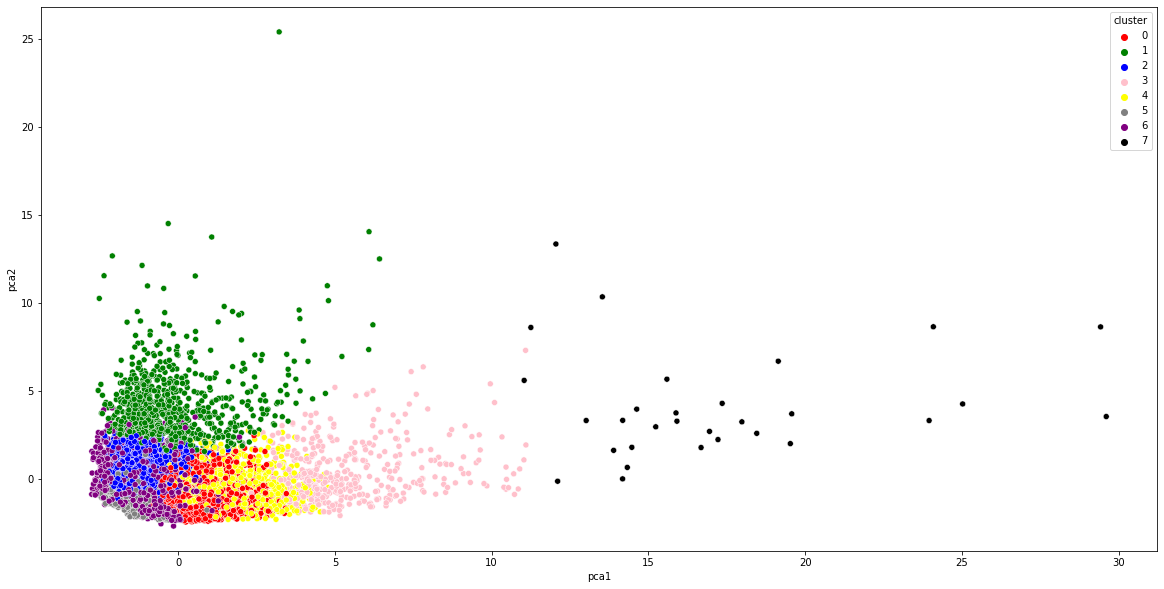

In [42]:
# Plot the graph with two components 
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

## APPLY AUTO ENCODERS 

In [43]:
# Create the Layers 
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform  # This is normalizer
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,)) # 17 Features 


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [44]:
# Display the shape
display (creditcard_df_scaled.shape)

(8950, 17)

In [45]:
# Create Auto Encoder – Fit model 
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 35ms/step - loss: 0.6248
Epoch 2/25
70/70 [==============================] - 3s 37ms/step - loss: 0.3780
Epoch 3/25
70/70 [==============================] - 3s 39ms/step - loss: 0.3174
Epoch 4/25
70/70 [==============================] - 2s 36ms/step - loss: 0.2786
Epoch 5/25
70/70 [==============================] - 3s 38ms/step - loss: 0.2363
Epoch 6/25
70/70 [==============================] - 3s 38ms/step - loss: 0.2244
Epoch 7/25
70/70 [==============================] - 3s 36ms/step - loss: 0.2052
Epoch 8/25
70/70 [==============================] - 3s 39ms/step - loss: 0.2025
Epoch 9/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1876
Epoch 10/25
70/70 [==============================] - 3s 42ms/step - loss: 0.1788
Epoch 11/25
70/70 [==============================] - 3s 43ms/step - loss: 0.1719
Epoch 12/25
70/70 [==============================] - 3s 47ms/step - loss: 0.1601
Epoch 13/25
70/70 [==================

In [46]:
# Auto Encoder Summary  
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [47]:
# Weights 
autoencoder.save_weights('autoencoder.h5')

In [48]:
# Generate autoencoder values.  
pred = encoder.predict(creditcard_df_scaled)
display (pd.DataFrame(pred))

0         1    2    3         4    5         6    7         8    9
0     0.0  0.602049  0.0  0.0  1.051515  0.0  0.493410  0.0  1.375802  0.0
1     0.0  3.542061  0.0  0.0  2.668556  0.0  2.139897  0.0  4.230911  0.0
2     0.0  0.223179  0.0  0.0  0.096884  0.0  2.054518  0.0  1.554061  0.0
3     0.0  0.590291  0.0  0.0  1.160528  0.0  1.726851  0.0  2.800796  0.0
4     0.0  0.518108  0.0  0.0  0.462901  0.0  0.492184  0.0  1.510843  0.0
...   ...       ...  ...  ...       ...  ...       ...  ...       ...  ...
8945  0.0  2.094757  0.0  0.0  4.255546  0.0  0.004677  0.0  0.698731  0.0
8946  0.0  2.724187  0.0  0.0  4.460185  0.0  0.197827  0.0  0.991715  0.0
8947  0.0  2.195770  0.0  0.0  4.383982  0.0  0.241642  0.0  1.309702  0.0
8948  0.0  1.542000  0.0  0.0  2.577138  0.0  0.000000  0.0  3.903007  0.0
8949  0.0  2.664088  0.0  0.0  3.309399  0.0  0.000000  0.0  2.906634  0.0

[8950 rows x 10 columns]

##### After auto encoder number of columns reduced to 10

In [49]:
# Display Shape 
pred.shape

(8950, 10)

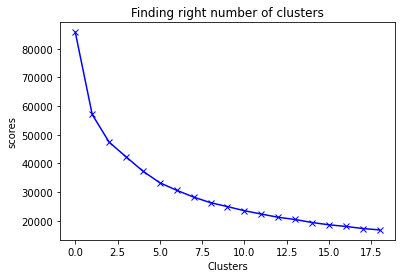

In [50]:
# Create Elbow graph  
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

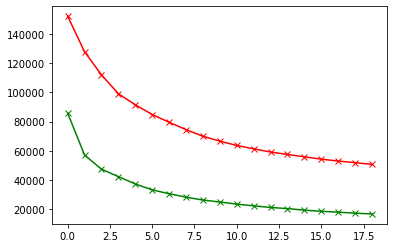

In [51]:
# Display the graph, current and earlier wcss values   
# Scores_1 – Earlier wcss values 
# Scores_2 – Current wcss values 
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [52]:
# Create K Means Cluster with optimal number of clusters. In this case it is 4 clusters 
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [53]:
# Display Cluster Details 
display(labels.shape) # Labels associated to each data point
display (labels.max())
display (labels.min())

(8950,)

3

0

In [54]:
# Display individual cluster numbers 
y_kmeans = kmeans.fit_predict(pred)
display(y_kmeans)

array([1, 0, 1, ..., 0, 0, 0])

In [55]:
# Concatenate Cluster number with Original Data Set 
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
display(df_cluster_dr.head())

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

In [56]:
# Apply PCA on auto encoded data set 
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
display (pca_df.head())

pca1      pca2
0 -1.685538 -0.231119
1  2.888172 -1.278491
2 -1.549817  0.047325
3 -0.455825 -0.489197
4 -1.944900 -0.593339

In [57]:
# Concatenate Cluster number with PCA Data Set 
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.685538 -0.231119        1
1  2.888172 -1.278491        2
2 -1.549817  0.047325        1
3 -0.455825 -0.489197        1
4 -1.944900 -0.593339        1

In [58]:
# Print Clusters and number records in each cluster 
pca_df.value_counts(pca_df.cluster)

cluster
1    5917
2    2286
0     688
3      59
dtype: int64

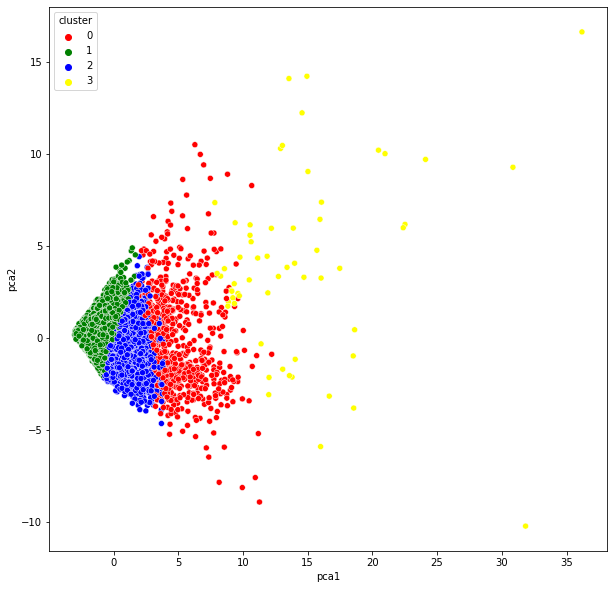

In [59]:
# Plot Graph 
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

##### Note: above graph 4 different color represent 4 different cluster